In [1]:
import numpy as np
with open('nohup.out') as f:
    contents = f.readlines()

In [2]:
len(contents) # 763

763

In [15]:
epoch_num = []
training_loss = []
training_acc =[]

validation_epoch =[]
validation_loss=[]
validation_acc = []
validation_bleu = []


for i in range(len(contents)):
  j = contents[i].split()
  try:
    if j[0] == 'Epoch:':
      epoch_num.append(j[1]) # format of [5][2300/2500]
      training_loss.append(j[12]) # format of float
      training_acc.append(j[16]) # after Accuracy
    elif j[0] == '*':
      #validation_epoch.append(f'{i/}'+'[%d]/313' % (range(3)+1)*100])
      validation_loss.append(j[3].split(',')[0]) # the value after LOSS -
      validation_acc.append(j[7].split(',')[0])
      validation_bleu.append(j[10])
    else:
      continue
  except:
    print(f"Exception handeled at nohup.out line # {i}")
    continue
  



281
341
343
414
416
452
454
490
492
528
530
566
568
604
606
642
644
680
682
683
686
722
724
760
762


In [35]:
# print(
#      "training_loss: ", training_loss, "trainig acc: ",training_acc, 
#      "validation loss: ", validation_loss, "validation_acc: ", validation_acc, "validation_bleu: ",validation_bleu)

In [21]:
training_loss = [float(i) for i in training_loss]
training_acc = [float(i) for i in training_acc]
validation_loss = [float(i) for i in validation_loss]
validation_acc = [float(i) for i in validation_acc]
validation_bleu = [float(i)*100 for i in validation_bleu]

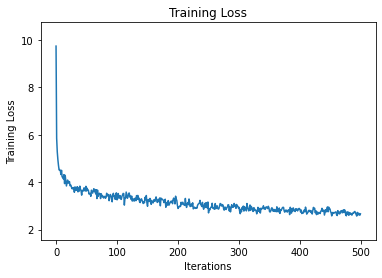

In [31]:
# plot "training_loss: , "trainig_acc: ", 
#      "validation_loss: ", "validation_acc: ", "validation_bleu: )
import matplotlib.pyplot as plt
plt.plot(np.arange(len(training_loss)), training_loss)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.ylim(min(training_loss)-1, max(training_loss)+1)
plt.title('Training Loss')
plt.show()



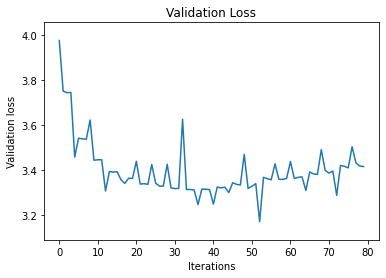

In [33]:
plt.plot(np.arange(len(validation_loss)), validation_loss)
plt.xlabel('Iterations')
plt.ylabel('Validation loss')
k = max(validation_loss)- min(validation_loss)
plt.ylim(min(validation_loss)-0.1*k, max(validation_loss)+0.1*k)
plt.title('Validation Loss')
plt.show()

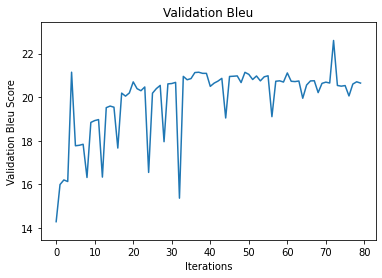

In [34]:
plt.plot(np.arange(len(validation_bleu)), validation_bleu)
plt.xlabel('Iterations')
plt.ylabel('Validation Bleu Score')
k = max(validation_bleu)- min(validation_bleu)
plt.ylim(min(validation_bleu)-0.1*k, max(validation_bleu)+0.1*k)
plt.title('Validation Bleu')
plt.show()